In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
data = read_csv('driver_features_2.txt', delimiter='\t',header=None)
X=data.iloc[:, 0:10].values
columns=['car_level','driver_authorized','gender',
     'age','license_issue_1','license_issue_2',
     'work_time','service_score','driver_income','driverver_online_time']
df = pd.DataFrame(X,columns=columns);

In [2]:
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

car_type=widgets.Dropdown(
    options={'100&400': 1, '500': 2, '900': 3},
    description='Car Type:',
)
display(car_type)

age=widgets.Dropdown(
    options={'25-35': 1, '35-45': 2},
    description='Age:',
)
display(age)

style = {'description_width': 'initial'}
income_unit_time=widgets.Dropdown(
    options={'Yes': 1, 'No': 2},
    description='Income/Time?:',style=style
)
display(income_unit_time)



A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

Subset the data based on the selection above

In [3]:
if  car_type.value==1:
        if age.value==1:
            df_t=df.loc[((df['car_level'] == 100) | (df['car_level']==400))& (df['age']>=25)&(df['age']<=35),];
        elif age.value==2:
            df_t=df.loc[((df['car_level'] == 100) | (df['car_level']==400))& (df['age']>35)&(df['age']<=45),];

if  car_type.value==2:
        if age.value==1:
            df_t=df.loc[((df['car_level'] == 500))&(df['age']>=25)&(df['age']<=35),];
        elif age.value==2:
            df_t=df.loc[((df['car_level'] == 500))&(df['age']>35)&(df['age']<=45),];

if  car_type.value==3:
        if age.value==1:
            df_t=df.loc[((df['car_level'] == 900))&(df['age']>=25)&(df['age']<=35),];
        elif age.value==2:
            df_t=df.loc[((df['car_level'] == 900))&(df['age']>35)&(df['age']<=45),];

if income_unit_time.value==1:
    data_div = df_t['driver_income']/df_t['driverver_online_time']
    df_t['driver_income']=data_div

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


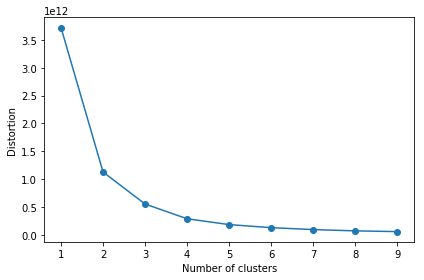

Distortion: 55849378496.26


In [4]:
X=df_t.as_matrix(columns=None)

distortions = []
from sklearn.cluster import KMeans
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
print('Distortion: %.2f' % km.inertia_)

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-10,
            random_state=0)

y_km = km.fit_predict(X)

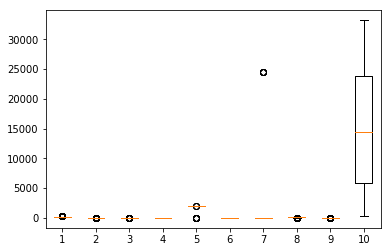

In [6]:
cl_1=X[y_km==0]
plt.boxplot(cl_1);


In [7]:
df_1 = pd.DataFrame(cl_1,columns=columns)
df_1.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000
mean,130.675910,0.900718,0.996039,30.908146,2003.701411,6.655608,58.742582,79.188854,0.077426,15266.848477
std,90.905487,0.299077,0.062822,2.983400,94.757823,3.469029,945.537478,13.859251,0.160865,9899.815547
min,100.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.002200,0.036200,0.000666,383.000000
25%,100.000000,1.000000,1.000000,28.000000,2006.000000,4.000000,16.543100,75.530650,0.018343,5811.000000
50%,100.000000,1.000000,1.000000,31.000000,2008.000000,7.000000,25.069800,82.880500,0.026782,14398.000000
75%,100.000000,1.000000,1.000000,34.000000,2011.000000,10.000000,30.147550,87.324650,0.056936,23880.000000
max,400.000000,1.000000,1.000000,35.000000,2015.000000,12.000000,24568.931800,100.882400,3.349418,33180.000000


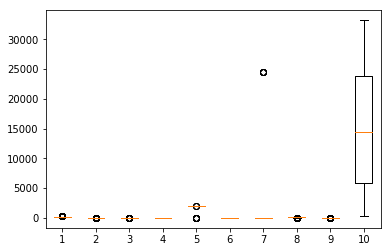

In [8]:
cl_2=X[y_km==0]
plt.boxplot(cl_2);


In [9]:
df_2 = pd.DataFrame(cl_2,columns=columns)
df_2.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000
mean,130.675910,0.900718,0.996039,30.908146,2003.701411,6.655608,58.742582,79.188854,0.077426,15266.848477
std,90.905487,0.299077,0.062822,2.983400,94.757823,3.469029,945.537478,13.859251,0.160865,9899.815547
min,100.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.002200,0.036200,0.000666,383.000000
25%,100.000000,1.000000,1.000000,28.000000,2006.000000,4.000000,16.543100,75.530650,0.018343,5811.000000
50%,100.000000,1.000000,1.000000,31.000000,2008.000000,7.000000,25.069800,82.880500,0.026782,14398.000000
75%,100.000000,1.000000,1.000000,34.000000,2011.000000,10.000000,30.147550,87.324650,0.056936,23880.000000
max,400.000000,1.000000,1.000000,35.000000,2015.000000,12.000000,24568.931800,100.882400,3.349418,33180.000000


In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
X=df_t[['gender','age','service_score']]
Y=df_t[['driver_income']]
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          driver_income   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.236
Date:                Sun, 25 Mar 2018   Prob (F-statistic):            0.00534
Time:                        19:14:34   Log-Likelihood:                 5841.7
No. Observations:                8086   AIC:                        -1.168e+04
Df Residuals:                    8082   BIC:                        -1.165e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0556      0.024      2.342      0.019       0.009       0.102
gender            0.0184      0.017      1.070      0.285      -0.015       0.052
age            2.876e-06      0.000      0.006      0.995      -0.001       0.001
service_score    -0.0003   9.79e-05     -3.378      0.001      -0.001      -0.000
==============================================================================
Omnibus:                    14030.028   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22321994.248
Skew:                          11.984   Prob(JB):                         0.00
Kurtosis:                     259.280   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the subset of the data based on age was not giving a very good R square, we decided go for regression based on the Car category 



# 100 and 400 level cars

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df_t=df.loc[((df['car_level'] == 100) | (df['car_level']==400)),];
X=df_t[['gender','age','service_score']]
Y=df_t['driver_income']/df_t['driverver_online_time']
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.258
Date:                Sun, 25 Mar 2018   Prob (F-statistic):           4.08e-06
Time:                        19:14:34   Log-Likelihood:                 9980.9
No. Observations:               23266   AIC:                        -1.995e+04
Df Residuals:                   23262   BIC:                        -1.992e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0654      0.012      5.510      0.000       0.042       0.089
gender           -0.0199      0.008     -2.396      0.017      -0.036      -0.004
age              -0.0005      0.000     -3.811      0.000      -0.001      -0.000
service_score     0.0003   8.21e-05      3.257      0.001       0.000       0.000
==============================================================================
Omnibus:                    54956.029   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        680656857.359
Skew:                          23.824   Prob(JB):                         0.00
Kurtosis:                     839.576   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Car Level 500

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df_t=df.loc[((df['car_level'] == 500)),];
X=df_t[['gender','age','service_score']]
Y=df_t['driver_income']/df_t['driverver_online_time']
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     148.7
Date:                Sun, 25 Mar 2018   Prob (F-statistic):           3.19e-96
Time:                        19:14:35   Log-Likelihood:             4.7170e+05
No. Observations:              138625   AIC:                        -9.434e+05
Df Residuals:                  138621   BIC:                        -9.433e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0173      0.000     67.045      0.000       0.017       0.018
gender            0.0005   8.91e-05      5.696      0.000       0.000       0.001
age           -5.065e-05   2.52e-06    -20.138      0.000   -5.56e-05   -4.57e-05
service_score  1.145e-05   2.62e-06      4.365      0.000    6.31e-06    1.66e-05
==============================================================================
Omnibus:                   267971.687   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1814177079.244
Skew:                          14.778   Prob(JB):                         0.00
Kurtosis:                     562.654   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Car level 900

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df_t=df.loc[((df['car_level'] == 900)),];
X=df_t[['gender','age','service_score']]
Y=df_t['driver_income']/df_t['driverver_online_time']
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.12
Date:                Sun, 25 Mar 2018   Prob (F-statistic):           1.47e-08
Time:                        19:14:39   Log-Likelihood:             1.0902e+05
No. Observations:               38571   AIC:                        -2.180e+05
Df Residuals:                   38567   BIC:                        -2.180e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.001     14.808      0.000       0.017       0.022
gender            0.0010      0.000      2.637      0.008       0.000       0.002
age           -4.893e-05   8.53e-06     -5.738      0.000   -6.56e-05   -3.22e-05
service_score -1.586e-06   1.42e-05     -0.112      0.911   -2.94e-05    2.62e-05
==============================================================================
Omnibus:                   129959.990   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      53979971255.351
Skew:                          60.616   Prob(JB):                         0.00
Kurtosis:                    5797.240   Cond. No.                     1.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""